In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data_beer = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/beer_dataset.csv")
data_beer = pd.read_csv("data/beer_dataset.csv")

In [3]:
X = np.array([data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)']]).T
X.shape

(365, 2)

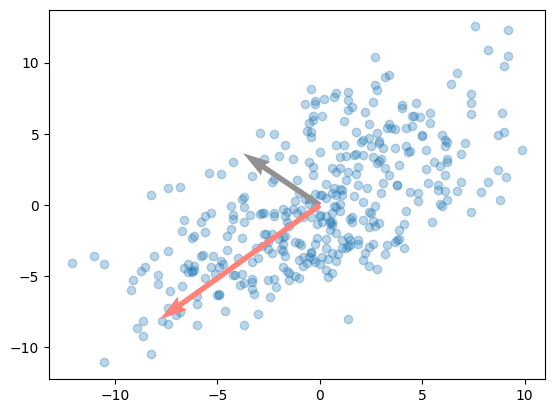

In [11]:
C = np.cov(X, rowvar=False)
C

eigvals, eigvecs = np.linalg.eig(C)
eigvals, eigvecs

u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)
u, v

X_centered = X - X.mean(axis=0)
plt.quiver(0, 0,
           2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1],
           color="#919191", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)
plt.quiver(0, 0,
           2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1],
           color="#FF8177", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)

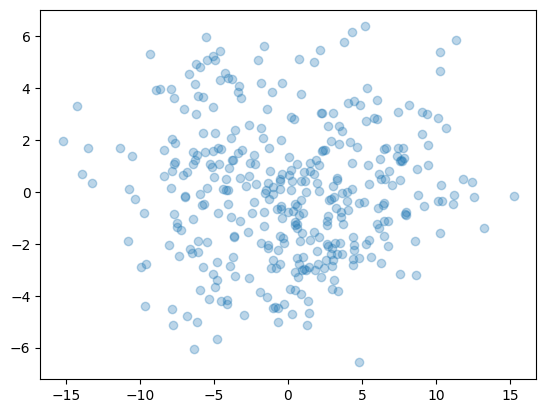

In [12]:
sort_index = eigvals.argsort()[::-1]

eigvals_sorted = eigvals[sort_index]
eigvecs_sorted = eigvecs[:, sort_index]
eigvecs_sorted

X_transformed = X_centered @ eigvecs_sorted

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.3)